# Inteligencia Artificial

## Algoritmos Genéticos

### Integrantes

- Aldana S. Cardoso Rastrelli - 98.408
- Nicolás Continanza - 97.576


## Breve Marco Histórico

Dentro del campo de la Inteligencia Artificial y la resolución automática de problemas, en la década del '60 John Holland y su equipo de la Universidad de Michigan presentan los algoritmos genéticos, inspirados en la evolución biológica y la selección natural para problemas computacionales y de investigación operativa. El objetivo original de Holland no era el diseño de algoritmos para la resolución de problemas específicos, sino el estudio formal del fenómeno de adaptación como sucede en la naturaleza y el desarrollo de técnicas y métodos para importar mecanismos de adaptación natural a sistemas de computadoras.

En su libro _Adaptation in Natural and Artificial Systems (1975)_, Holland presenta un algoritmo genético como un método para pasar de una población de "cromosomas" (un conjunto de bits) a una nueva población evolucionada, mediante un proceso de selección natural junto con un conjunto de operadores inspirados en la genética (entrecruzamiento, mutación e inversión). Cada cromosoma consiste de "genes" (bits), cada uno siendo una instancia de un "alelo" (0 ó 1). El operador de selección elige aquellos cromosomas de la población que podrán reproducirse, y en promedio los cromosomas más aptos producen más descendencia que los menos aptos. El operador de crossover (entrecruzamiento, también llamado recombinación en buena parte de la literatura) intercambia subpartes de dos cromosomas, imitando la recombinación cromosómica entre dos haploides (células con un solo juego de cromosomas). El operador de mutación cambia aleatoriamente el valor de los alelos de algunas posiciones en el cromosoma. Y el operador de inversión invierte el orden de una sección contigua del cromosoma, cambiando el orden de los genes.

Con el pasar de los años hubo una amplia interacción entre investigadores que se dedicaron a estudiar variados métodos evolutivos computacionales, corriendo cada vez más los límites entre algoritmos genéticos, estrategias evolutivas y programación evolutiva, al punto de que al día de hoy el término _algoritmo genético_ se utiliza para describir cosas bastante lejanas a la concepción original de Holland, incorporando técnicas de machine learning para encontrar buenas (y a veces incluso óptimas) soluciones a problemas combinatorios con una inmensa cantidad de soluciones posibles.


## Algunas definiciones básicas

Comencemos con unas pocas y breves definiciones, que nos servirán para introducir un primer ejemplo utilizando el vocabulario específico del tema.

#### Población

Dado un problema combinatorio, en el contexto de Algoritmos Genéticos llamaremos _población_ al conjunto de soluciones posibles para ese problema. En el marco de este Trabajo Práctico, ese conjunto siempre será discreto y finito.

#### Cromosoma

Un _Cromosoma_, _Individuo_ o _Genotipo_ (los tres términos se utilizan como sinónimos en la literatura) es un elemento particular de la población. Se lo suele representar como una combinación de bits, a la que se denomina _Genoma_.

#### Gen

Si consideramos un cromosoma como una combinación de bits, llamaremos _Gen_ a cada posición de esa combinación. Sus posibles valores, 0 ó 1, son conocidos como _Alelos_.


## Un primer ejemplo

Los algoritmos genéticos utilizan la exploración aleatoria del espacio del problema, combinando procesos evolutivos como la mutación y el crossover para mejorar las conjeturas. Pero también, al no tener experiencia en el dominio del problema, intentan cosas que un humano nunca intentaría. De esta manera, una persona usando un algoritmo genético puede aprender más acerca del espacio del problema y potenciales soluciones, pudiendo así realizar mejoras al algoritmo en un círculo virtuoso.

Tomemos como ejemplo inicial el ejercicio de adivinar una contraseña. Para simplificar el problema y poner el foco en lo que nos interesa, conocemos de antemano la longitud de la contraseña. Para ayudar a introducir algunos conceptos iniciales, después de cada intento tendremos la posibilidad de saber cuántas letras estaban en la posición correcta. Por ejemplo, si la contraseña es "Hello World!" y se intenta con la cadena "World!Hello?" se obtendrá el número 2, ya que solo la cuarta letra de cada palabra está en la posición correcta.

Pseudocódigo:

```
_letters = [a..zA..Z !]
target = "Hello World!"
guess = get 12 random letters from _letters
while guess != target:
  index = get random value from [0..length of target]
  guess[index] = get 1 random value from _letters
```

### Genes

Para comenzar, los algoritmos genéticos necesitan un set de genes para construir las posibles soluciones. Para este ejemplo inicial, el set de genes serán las letras del abecedario, y los caracteres `' '`, `'!'`, `'?'`, `','` y `'.'`. También es necesario un target (la contraseña a adivinar):


In [339]:
geneSet = " abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!.,?"
target = "Hello World!"


A continuación, el algoritmo deberá tener una manera de generar una cadena aleatoria a partir del set de genes, que será el punto de partida del proceso evolutivo. Por eso se lo llama _Generación 0_.


In [340]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def generate_parent(length):
    genes = []
    while len(genes) < length:
        sampleSize = min(length - len(genes), len(geneSet))
        genes.extend(random.sample(geneSet, sampleSize))
    return ''.join(genes)


La función `random.sample()` toma una cantidad `sampleSize` de valores de la entrada sin reposición. Por lo tanto no habrá valores repetidos en el parent generado, salvo que `geneSet` contenga repetidos o `length` sea mayor que `len(geneSet)`. Esta implementación puede generar una larga cadena de caracteres a partir de un pequeño conjunto de genes, y usa tantos genes únicos como sea posible.


### Función de Aptitud (Fitness Function)

El valor de fitness que provee el algoritmo genético es el único feedback que el sistema obtiene para guiarse hacia una solución. En este ejemplo, el valor de fitness es la cantidad total de letras en un intento que coinciden con la letra del target en la misma posición. Es decir, la cantidad de genes que están en la posición correcta del genoma que representa la solución.


In [341]:
def get_fitness(guess, target):
    return sum(1 for expected, actual in zip(target, guess)
               if expected == actual)


### Mutación

A continuación, el sistema requiere de una forma de producir un nuevo intento mutando el actual. Es decir, "avanzar" una generación. La siguiente función convierte la cadena `parent` en un array, y luego reemplaza una letra del array con una elegida aleatoriamente de `geneSet`, recombinando el resultado nuevamente en una cadena de caracteres.


In [342]:
def mutate(parent):
    index = random.randrange(0, len(parent))
    childGenes = list(parent)
    newGene, alternate = random.sample(geneSet, 2)
    childGenes[index] = alternate \
        if newGene == childGenes[index] \
        else newGene
    return ''.join(childGenes)


Se usa un reemplazo alternativo en caso de que `newGene` (seleccionado aleatoriamente) sea igual al que se supone que reemplazará, para prevenir un número significativo de cromosomas irrelevantes.


### Mostrando resultados

Queremos monitorear el paso a paso del algoritmo para tener una noción de su avance y sacar conclusiones. Una representación visual de la secuencia genética suele ser crítico para identificar qué funciona y qué no, para que el algoritmo pueda ser mejorado.

En nuestro caso, mostraremos también el valor de fitness y cuánto tiempo transcurrió.


In [343]:
import datetime


def display(guess, startTime, target):
    timeDiff = datetime.datetime.now() - startTime
    fitness = get_fitness(guess, target)
    print("{0}\t{1}\t{2}".format(guess, fitness, str(timeDiff)))


Pasemos a poner en práctica nuestro algoritmo y analizar los resultados obtenidos.
En esencia, el algoritmo consistirá de los siguientes pasos:

1. Generar un cromosoma aleatorio.
2. Obtener el valor `fitness` para ese cromosoma.
3. Comparar el valor `fitness` obtenido con el del cromosoma de la generación anterior.
4. Conservar el intento con mejor `fitness` (Selección Natural).

Esto se repite en un ciclo hasta que ocurra una condición de corte, que en nuestro caso es haber encontrado la contraseña correcta (`fitness = 12`).


In [344]:
def run_example(example_target, display_res: bool):
    generations = 0
    random.seed()
    startTime = datetime.datetime.now()
    bestParent = generate_parent(len(example_target))
    bestFitness = get_fitness(bestParent, example_target)
    if display_res:
        display(bestParent, startTime, example_target)
    childFitness = bestFitness

    while childFitness < len(bestParent):
        generations += 1
        child = mutate(bestParent)
        childFitness = get_fitness(child, example_target)
        if bestFitness >= childFitness:
            continue
        if display_res:
            display(child, startTime, example_target)
        bestFitness = childFitness
        bestParent = child

    return generations

print(f"Generations: {run_example(target, True)}")

OLmcXnxESJuj	0	0:00:00.000339
OLmcX xESJuj	1	0:00:00.001093
OLmcX xESJdj	2	0:00:00.001332
OLmcX xESJd!	3	0:00:00.002167
OLmcX xESld!	4	0:00:00.002861
OLmlX xESld!	5	0:00:00.003489
OLmlX xoSld!	6	0:00:00.004654
OLmlo xoSld!	7	0:00:00.005649
OLmlo WoSld!	8	0:00:00.005948
HLmlo WoSld!	9	0:00:00.008435
HLmlo World!	10	0:00:00.012802
Hemlo World!	11	0:00:00.012923
Hello World!	12	0:00:00.025703
Generations: 4069


Vemos que obtener una contraseña sencilla con este elemental algoritmo genético tomó poco más de 1 centésima de segundo.
Probamos con otros targets sencillos:


Target: Hello World!
Target: It is alive!
Target: Lorem ipsum
Target: I am your father
Target: Aloha means family
Target: Use the force
Target: I am not a robot


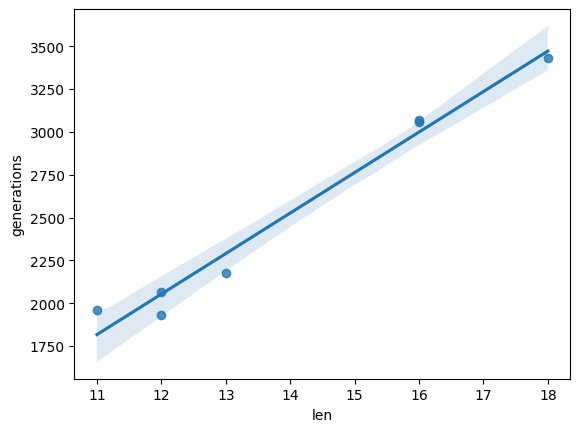

In [345]:
ex_targets = ["Hello World!", "It is alive!", "Lorem ipsum", "I am your father", "Aloha means family", "Use the force", "I am not a robot"]

def make_df(col1_name, col2_name, x, y):
        """Quickly make a DataFrame"""
        index = [i for i in range(len(y))]
        data = {col1_name:x,col2_name:y}
        return pd.DataFrame(data)

def plot_results_for(targets):
    children_results = []
    sample_size = 100

    for tgt in targets:
        print(f"Target: {tgt}")
        child_result = []
        for i in range(sample_size):
            child_result.append(run_example(tgt, False))
        children_results.append(sum(child_result) / sample_size)

    lens = [len(t) for t in targets]

    df = make_df("len", "generations", lens,children_results)

    sns.regplot(df, x= "len", y="generations")
    plt.show()

plot_results_for(ex_targets)

Vemos que la cantidad de mutaciones necesarias para encontrar la solución se relaciona de forma proporcional con la cantidad de caracteres que tiene la contraseña. Vamos a probar con contraseñas más largas:

Target: Lorem
Target: Lorem ipsum
Target: Lorem ipsum dolor
Target: Lorem ipsum dolor sit
Target: Lorem ipsum dolor sit amet
Target: Lorem ipsum dolor sit amet consectetur
Target: Lorem ipsum dolor sit amet consectetur adipiscing
Target: Lorem ipsum dolor sit amet consectetur adipiscing elit.
Target: Lorem ipsum dolor sit amet consectetur adipiscing elit. Proin
Target: Lorem ipsum dolor sit amet consectetur adipiscing elit. Proin pharetra
Target: Lorem ipsum dolor sit amet consectetur adipiscing elit. Proin pharetra dapibus
Target: Lorem ipsum dolor sit amet consectetur adipiscing elit. Proin pharetra dapibus bibendum.


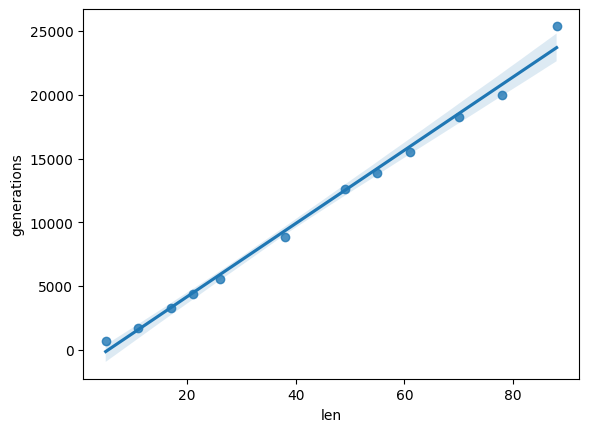

In [346]:
long_targets = ["Lorem", "Lorem ipsum", "Lorem ipsum dolor", "Lorem ipsum dolor sit", "Lorem ipsum dolor sit amet", "Lorem ipsum dolor sit amet consectetur", "Lorem ipsum dolor sit amet consectetur adipiscing", "Lorem ipsum dolor sit amet consectetur adipiscing elit.", "Lorem ipsum dolor sit amet consectetur adipiscing elit. Proin", "Lorem ipsum dolor sit amet consectetur adipiscing elit. Proin pharetra", "Lorem ipsum dolor sit amet consectetur adipiscing elit. Proin pharetra dapibus", "Lorem ipsum dolor sit amet consectetur adipiscing elit. Proin pharetra dapibus bibendum."]
plot_results_for(long_targets)

Vemos el algoritmo se comporta de forma lineal, y para una contraseña que tiene 3 veces más de caracteres, se necesitan 3.85 veces más de generaciones en el peor caso para encontrar la solución. La cantidad de generaciones respecto de longitud de caracteres sigue teniendo una buena relación; pero vemos que a mayor cantidad de caracteres también aumenta la cantidad de generaciones y, por lo tanto, también el tiempo de respuesta del mismo.

## Solución al Problema de la Mochila usando un algoritmo genético

A continuación, un ejemplo más difícil que nos permitirá ver con más claridad la potencia de esta técnica: el Problema de la Mochila.

Partimos del problema clásico: tenemos un conjunto de ítems que queremos guardar en una mochila. Para cada ítem, conocemos su peso y le agregamos un valor que representa la importancia de ese ítem. Por otro lado tenemos una mochila, que tiene un límite de peso que puede soportar. Queremos construir un algoritmo que nos permita encontrar la combinación de ítems a meter en la mochila, de forma tal que se maximice el valor total sin exceder el límite de peso.

Comencemos por la representación genética de una solución: aquí nuestra _población_ son todas las posibles combinaciones de los ítems disponibles, donde cada una de ellas es un _cromosoma_.

Si bien Python es un lenguaje de tipado dinámico que no obliga a explicitar los tipos, lo haremos con la biblioteca [`typing`](https://docs.python.org/3/library/typing.html) para favorecer la claridad y comprensión del código al introducir el vocabulario específico del dominio de los algoritmos genéticos.


In [347]:
from typing import Callable, List, NamedTuple, Tuple

# type declaration
Genome = List[int]
Population = List[Genome]
FitnessFunction = Callable[[Genome], int]
PopulateFunction = Callable[[], Population]
SelectionFunction = Callable[[Population,
                              FitnessFunction], Tuple[Genome, Genome]]
CrossoverFunction = Callable[[Genome, Genome], Tuple[Genome, Genome]]
MutationFunction = Callable[[Genome], Genome]
Item = NamedTuple(
    'Item', [('name', str), ('value', float), ('weight', float)])


Como en todos los problemas combinatorios, una de las dificultades para encontrar soluciones óptimas reside en la magnitud del conjunto de soluciones posibles. Este problema no es la excepción, ya que a medida que crece la cantidad de cosas que nos interesaría llevar en la mochila, crece exponencialmente la cantidad de combinaciones posible.

Es por esto que para la generación 0 usaremos una población de tamaño fijo, construida a partir de genomas generados aleatoriamente.


In [348]:
from random import choices

def generate_genome(length: int) -> Genome:
    return choices([0, 1], k=length)


def generate_population(size: int, genome_length: int) -> Population:
    return [generate_genome(genome_length) for _ in range(size)]

generate_population(3, 5)

[[0, 1, 1, 1, 0], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1]]

Para la función de fitness nos aseguraremos que el genoma tenga tantos genes como elementos queremos seleccionar para meter en la mochila, y luego calcularemos el valor total de los elementos que ese genoma inserta en la mochila como la suma de los valores de cada ítem individual. Si la combinación del genoma dado excede el límite de peso, el valor total es 0 para descartar fácilmente ese genoma.


In [349]:
def fitness(genome: Genome, items: List[Item], weight_limit: float) -> float:
    if len(genome) != len(items):
        raise ValueError("Genome length must be equal to number of items")
    weight = 0
    value = 0

    for i, item in enumerate(items):
        if genome[i] == 1:
            weight += item.weight
            value += item.value

            if weight > weight_limit:
                return 0

    return value


A continuación construiremos una función de selección, que nos servirá para seleccionar a los mejores cromosomas de una población, que serán los que luego tendrán descendencia. Usaremos nuevamente la función choices(), pero esta vez la distribución de probabilidad no será uniforme sino que estará determinada por la función de fitness, para favorecer la selección de aquellos genomas más "aptos".


In [350]:
def selection_pair(population: Population, fitness_function: FitnessFunction) -> Population:
    return choices(population=population, weights=[fitness_function(genome) for genome in population], k=2)


Ahora necesitamos una función de crossover, que nos permita combinar dos genomas para producir dos genomas nuevos (su descendencia), donde cada hijo contiene información genética de cada uno de sus padres. Para ello, elegiremos un punto de corte aleatorio y luego intercambiaremos los genes de cada genoma a partir de ese punto.

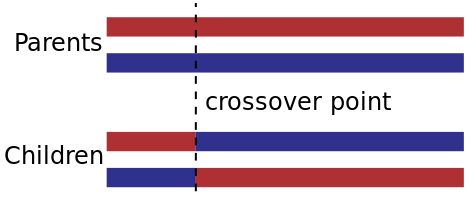 \
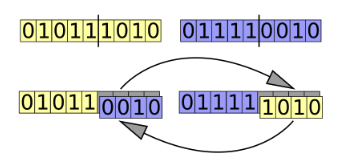

In [351]:
from random import randint


def single_point_cross_over(parent1: Genome, parent2: Genome) -> Tuple[Genome, Genome]:
    if len(parent1) != len(parent2):
        raise ValueError("Both genomes must be of equal length")
    cross_over_point = randint(1, len(parent1) - 1)
    return [parent1[:cross_over_point] + parent2[cross_over_point:], parent2[:cross_over_point] + parent1[cross_over_point:]]


Finalmente, una función de mutación que cambia uno o más genes al azar en un genoma, con una cierta probabilidad.

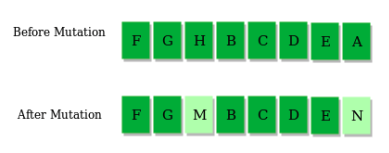

In [352]:
from random import randrange, random


def mutation(genome: Genome, num: int = 1, probability: float = 0.5) -> Genome:
    for _ in range(num):
        index = randrange(len(genome))
        genome[index] = genome[index] if random(
        ) > probability else abs(genome[index] - 1)
    return genome


Ahora pondremos todas estas funciones en uso, y veremos cómo se comporta el algoritmo genético para resolver el problema de la mochila simulando la evolución de una generación inicial de cromosomas, esta vez con los operadores de selección, crossover y mutación. Vamos a aprovechar las funciones de alto orden en Python y generalizar para que la simulación de la evolución pueda realizarse con cualquier función que se reciba como parámetro. Tendremos además un límite de generaciones, para forzar un corte si el algoritmo no logra encontrar una solución óptima antes.

Para el método de selección usaremos la función `selection_pair()` que implementamos anteriormente, que es la forma de reproducción originalmente propuesta por Holland al definir los algoritmos genéticos. También agregaremos la noción de elitismo (introducida por Kenneth De Jong en 1975), que consiste en que los mejores cromosomas de la generación anterior se conserven en la siguiente generación sin mutar, para favorecer la convergencia hacia una solución óptima. En nuestro caso, tomaremos a los dos mejores cromosomas de cada generación.

In [353]:
def run_evolution(
    populate_function: PopulateFunction,
    fitness_function: FitnessFunction,
    fitness_limit: int,
    selection_function: SelectionFunction = selection_pair,
    crossover_function: CrossoverFunction = single_point_cross_over,
    mutation_function: MutationFunction = mutation,
    generation_limit: int = 100,
) -> Tuple[Population, int]:
    """Returns Population and number of generations needed"""
    population = populate_function()
    for i in range(generation_limit):
        population = sorted(population,
                            key=lambda genome: fitness_function(genome),
                            reverse=True)
        if fitness_function(population[0]) >= fitness_limit:
            return population, i
        # elitism
        next_generation = population[0:2]

        for _ in range(int(len(population) - 2) - 1):
            parents = selection_function(population, fitness_function)
            children = crossover_function(parents[0], parents[1])
            children = [mutation_function(child) for child in children]
            next_generation.extend(children)
        population = next_generation

    population = sorted(population,
                        key=lambda genome: fitness_function(genome),
                        reverse=True)

    return population, i


In [359]:
from functools import partial
import time

def run_backpack_example(items, fitness_limit, generation_limit, print_stats: bool):

    start = time.time()
    population, generations = run_evolution(
        populate_function=partial(
            generate_population, size=10, genome_length=len(items)),
        fitness_function=partial(fitness, items=items, weight_limit=3000),
        fitness_limit=fitness_limit,
        generation_limit=generation_limit
    )
    end = time.time()

    best_solution = [items[i].name for i,
        item in enumerate(population[0]) if item == 1]

    if print_stats:
        print(f"Number of generations: {generations}")
        print(f"Time: {end - start}s")
        print(f"Best solution: ", best_solution)
        print(f"Weight", sum([items[i].weight for i,
            item in enumerate(population[0]) if item == 1]))
        print(f"Value", sum([items[i].value for i,
            item in enumerate(population[0]) if item == 1]))
    
    return best_solution

items = [
        Item('Laptop', 500, 2200),
        Item('Headphones', 150, 160),
        Item('Coffee Mug', 60, 350),
        Item('Notepad', 40, 333),
        Item('Water Bottle', 30, 192),
    ]

run_backpack_example(items, 740, 100, True)

Number of generations: 3
Time: 0.0022351741790771484s
Best solution:  ['Laptop', 'Headphones', 'Coffee Mug', 'Water Bottle']
Weight 2902
Value 740


['Laptop', 'Headphones', 'Coffee Mug', 'Water Bottle']

Con una lista más grande de elementos, vemos que el número de generaciones también aumenta:

In [360]:
more_items = [
    Item('Candy', 5, 25),
    Item('Socks', 10, 38),
    Item('Tissues', 15, 80),
    Item('Phone', 500, 200),
    Item('Hat', 100, 70)
] + items

run_backpack_example(more_items, 1310, 100, True)

Number of generations: 4
Time: 0.007366180419921875s
Best solution:  ['Candy', 'Socks', 'Tissues', 'Phone', 'Hat', 'Laptop', 'Headphones', 'Water Bottle']
Weight 2965
Value 1310


['Candy',
 'Socks',
 'Tissues',
 'Phone',
 'Hat',
 'Laptop',
 'Headphones',
 'Water Bottle']

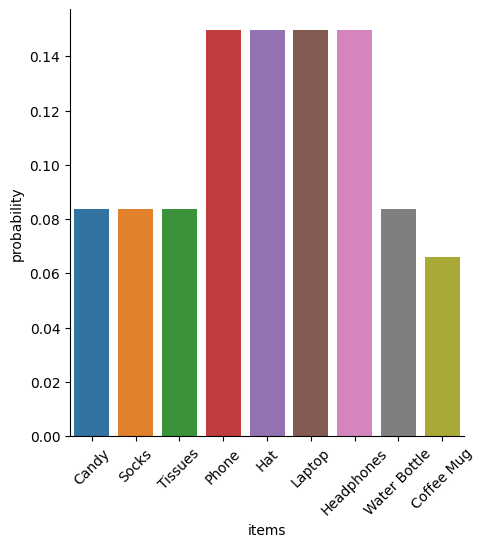

In [380]:
def run_example_by_times_for_items(times: int, items, print_stats: bool):
    best_solutions = []
    for _ in range(times):
        best_solutions.append(run_backpack_example(items, 1310, 100, print_stats))
    
    return best_solutions

def get_probability(items):
    prob = {}
    for item in items:
        if prob.get(item):
            prob[item]+= 1
        else:
            prob[item] = 1

    items_num = len(items)

    for key in prob.keys():
        prob[key] = prob[key] / items_num
    
    return prob    
    
def plot_backpack_example():

    best_solutions = run_example_by_times_for_items(100, more_items, False)
    best_solutions_res = []
    [ best_solutions_res.extend(elem) for elem in best_solutions] 
    
    probs = get_probability(best_solutions_res)

    df = make_df("items", "probability", probs.keys(), probs.values())

    sns.catplot(df, x= "items", y="probability", kind="bar")
    plt.xticks(rotation=45)
    plt.show()

plot_backpack_example()

## Bibliografía

- Clinton Sheppard. _Genetic Algorithms with Pyhton_. CreateSpace Independent Publishing Platform, 2016.
- M. Mitchell. _An introduction to genetic algorithms_. MIT Press, 1999.
- Frances Buontempo. _Genetic Algorithms and Machine Learning for Programmers_. The Pragmatic Bookshelf, Raleigh, NC, 2019.

## Algunos casos de estudio interesantes

### Geijtenbeek, van de Panne, van der Stappen. 2013. Flexible Muscle-Based Locomotion for Bipedal Creatures. [PDF](https://www.goatstream.com/research/papers/SA2013/).

En este trabajo se utiliza un algoritmo genético para definir un método de control basado en músculos y huesos para simular la locomoción de una variedad de bípedos. El algoritmo se encarga de distribuir los huesos y músculos dentro del cuerpo (que ya tiene una geometría previamente definida) y la forma de controlarlos para que el bípedo pueda caminar de forma natural. Luego se utiliza para generar movimientos más complejos como correr, saltar, etc. en distintos tipos de terrenos.
Un buen resumen de este trabajo se puede encontrar en: https://www.youtube.com/watch?v=kQ2bqz3HPJE

### Hornby, Globus, Linden, Lohn. 2006. Automated Antenna Design with Evolutionary Algorithms. [PDF](http://alglobus.net/NASAwork/papers/Space2006Antenna.pdf).

En este trabajo se utilizan algoritmos genéticos para automatizar y optimizar el diseño de antenas de radiofrecuencia para misiones espaciales. El algoritmo genético se encarga de definir la geometría de la antena, la forma de alimentarla y la forma de controlarla para que pueda transmitir y recibir señales de radiofrecuencia.